In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
def construct(AV, IV, duration, N):
    """ Construct matrix TC """
    
    tc = np.array([])
    iv_count = IV
    
    # onsets arrival vector
    tc = np.zeros(AV)
    
    while len(tc) < N:
        
        # duration of ones
        
        for i in range(duration):
            if len(tc) >= N:
                break
            tc = np.append(tc, 1)

        # increment vector
        while (len(tc) < iv_count) & (len(tc) < N):
            tc = np.append(tc, 0)
        iv_count += IV
        
        # onsets arrival vector
        for i in range(AV):
            if len(tc) >= N:
                break
            tc = np.append(tc, 0)
        
    # Standardise
    tc = tc - np.mean(tc)
    tc = tc / np.std(tc)
    
    return tc

In [176]:
#(AV) = [0,20,0,0,0,0], (IV) = [30,45,60,40,40,40], duration of ones = [15,20,25,15,20,25].
tc1 = construct(0, 30, 15, 240)
tc2 = construct(20, 45, 20, 240)
tc3 = construct(0, 60, 25, 240)
tc4 = construct(0, 40, 15, 240)
tc5 = construct(0, 40, 20, 240)
tc6 = construct(0, 40, 25, 240)
TC = [tc1, tc2, tc3, tc4, tc5, tc6]

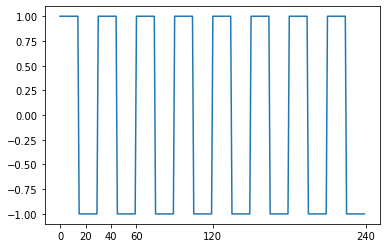

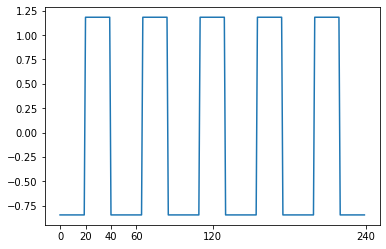

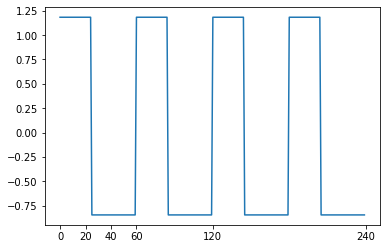

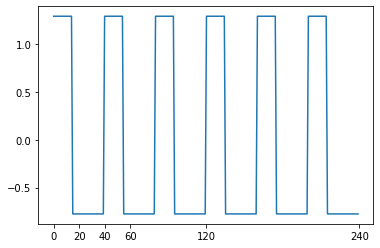

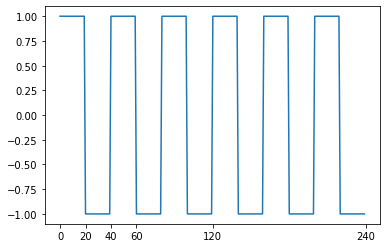

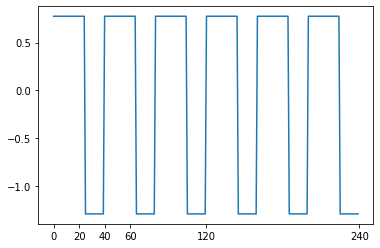

In [177]:
for tc in TC:
    plt.plot(tc)
    plt.xticks([0, 20, 40, 60, 120, 240])
    plt.show()